In [ ]:
#DIANA

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from scipy.spatial.distance import pdist

dist_matrix = pdist(X)


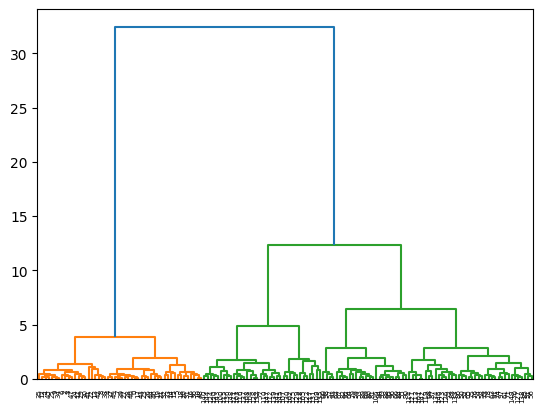

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import matplotlib.pyplot as plt
Z = linkage(dist_matrix, method='ward')

clusters = fcluster(Z, t=3, criterion='maxclust')
ltp=plt
dendrogram(Z)
ltp.show()

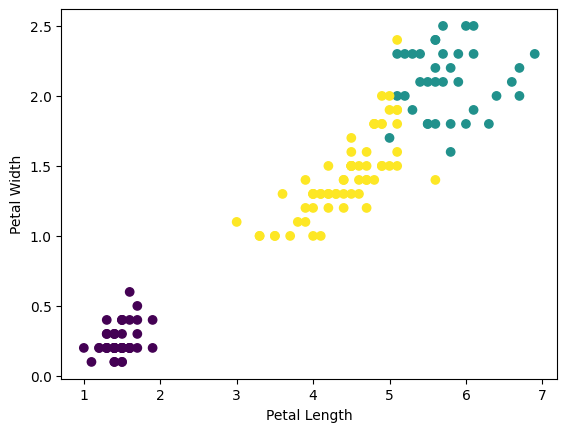

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data=X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['cluster'] = clusters - 1

plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()



Cluster 1 has 50 points
Cluster 2 has 2 points
Cluster 3 has 98 points


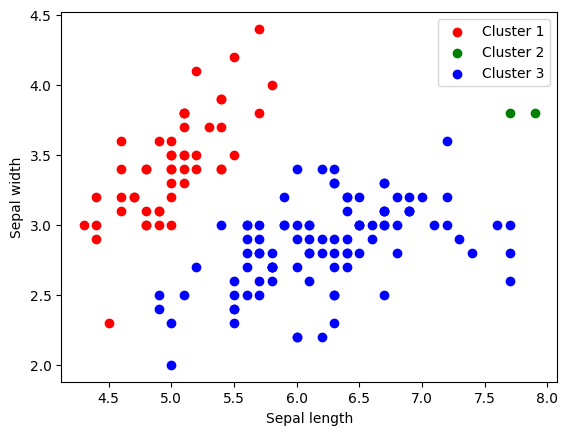

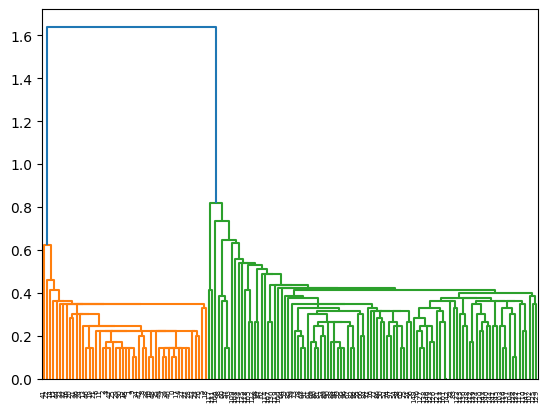

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
iris = load_iris()
X = iris.data
y = iris.target
Z = linkage(X, method='single', metric='euclidean')
clusters = fcluster(Z, t=3, criterion='maxclust')
for i in range(1, 4):
    print(f"Cluster {i} has {np.sum(clusters == i)} points")
colors = ['red', 'green', 'blue']

for i in range(1, 4):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c=colors[i-1], label=f'Cluster {i}')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()
ltp=plt
dendrogram(Z)
ltp.show()

Without Lib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = [center]
    
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
    
    def distance_to(self, other):
        return euclidean_distance(self.center, other.center)
    
    def merge(self, other):
        self.points.extend(other.points)
        self.update_center()
        
def diana_clustering(X, k):
    # Initialize clusters with the first k data points as centers
    clusters = [Cluster(center=X[i]) for i in range(k)]
    
    # Assign each remaining data point to its closest cluster
    for i in range(k, len(X)):
        distances = [c.distance_to(Cluster(center=X[i])) for c in clusters]
        closest_cluster = clusters[np.argmin(distances)]
        closest_cluster.points.append(X[i])
        closest_cluster.update_center()
    
    # Iteratively merge clusters until there are only k clusters remaining
    while len(clusters) > k:
        # Compute the distance between each pair of clusters
        distances = np.zeros((len(clusters), len(clusters)))
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distances[i,j] = clusters[i].distance_to(clusters[j])
        distances += distances.T
        
        # Identify the pair of clusters with the minimum distance
        i, j = np.unravel_index(np.argmin(distances), distances.shape)
        
        # Merge the two clusters
        clusters[i].merge(clusters[j])
        del clusters[j]
    
    return clusters


In [ ]:
clusters = diana_clustering(X, k=3)

for i, c in enumerate(clusters):
    print(f"Cluster {i+1} has {len(c.points)} points and center {c.center}")


Cluster 1 has 124 points and center [6.07096774 3.03467742 4.24354839 1.4016129 ]
Cluster 2 has 15 points and center [4.92       3.2        1.52666667 0.25333333]
Cluster 3 has 11 points and center [4.53636364 3.11818182 1.32727273 0.20909091]


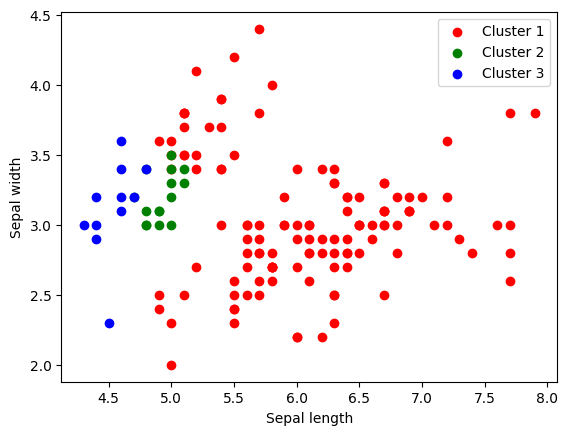

In [ ]:
colors = ['red', 'green', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i, c in enumerate(clusters):
    plt.scatter([p[0] for p in c.points], [p[1] for p in c.points], c=colors[i], label=labels[i])


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()
